# Setup 

In [ ]:
!pip install kaggle_environments

# GFootball environment.
!apt-get update -y
!apt-get install -y libsdl2-gfx-dev libsdl2-ttf-dev

# Make sure that the Branch in git clone and in wget call matches !!
!git clone -b v2.3 https://github.com/google-research/football.git
!mkdir -p football/third_party/gfootball_engine/lib

# Download precompiled .so
!wget https://storage.googleapis.com/gfootball/prebuilt_gameplayfootball_v2.3.so -O football/third_party/gfootball_engine/lib/prebuilt_gameplayfootball.so
!cd football && GFOOTBALL_USE_PREBUILT_SO=1 pip3 install .
!pip install reinforcement_learning_keras

     |████████████████████████████████| 1.2 MB 15.3 MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40

 # All the imports 

In [ ]:
import matplotlib.pyplot as plt
import pprint
import glob 
import imageio
import pathlib
import numpy as np
from typing import Tuple
from tqdm import tqdm
import os
import sys
from IPython.display import Image
# from kaggle_football.viz import generate_gif, plot_smm_obs

# Gym Interface

In [ ]:
import gym
import gfootball  # Required as envs registered on import

simple_env = gym.make("GFootball-11_vs_11_kaggle-simple115v2-v0") # ftiaxno 3 environments ena me koukides
pixels_env = gym.make("GFootball-11_vs_11_kaggle-Pixels-v0") #ena me pixels kanonika
smm_env = gym.make("GFootball-11_vs_11_kaggle-SMM-v0") #ena pou einai me koukides alla buggy 

print(f"simple115v2:\n {simple_env.__str__()}\n")
print(f"Pixels:\n {pixels_env.__str__()}\n")
print(f"SMM:\n {smm_env.__str__()}\n")

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


simple115v2:
 <GetStateWrapper<SingleAgentRewardWrapper<SingleAgentObservationWrapper<Simple115StateWrapper<FootballEnv<GFootball-11_vs_11_kaggle-simple115v2-v0>>>>>>

Pixels:
 <GetStateWrapper<SingleAgentRewardWrapper<SingleAgentObservationWrapper<PixelsStateWrapper<FootballEnv<GFootball-11_vs_11_kaggle-Pixels-v0>>>>>>

SMM:
 <GetStateWrapper<SingleAgentRewardWrapper<SingleAgentObservationWrapper<SMMWrapper<FootballEnv<GFootball-11_vs_11_kaggle-SMM-v0>>>>>>



# Environment

In [ ]:
from gfootball.env.football_env import FootballEnv

env_name = "GFootballBase-v0"
gym.envs.register(id=env_name,
                  entry_point="gfootball.env.football_env:FootballEnv",
                  max_episode_steps=10000)

In [ ]:
from gfootball.env.config import Config

base_env = gym.make(env_name, config=Config())#ftiaxno enviroment me gym.make  me to onoma tou env name


# Observation Space

In [ ]:
obs = base_env.reset()
print(obs.shape)
pprint.pprint(obs[0])


{'active': 6,
 'ball': array([ 0.        , -0.        ,  0.11061639]),
 'ball_direction': array([ 0.        , -0.        ,  0.00616395]),
 'ball_owned_player': -1,
 'ball_owned_team': -1,
 'ball_rotation': array([ 0., -0.,  0.]),
 'designated': 6,
 'game_mode': 0,
 'left_team': array([[-1.01102936, -0.        ],
       [ 0.        ,  0.02032536],
       [ 0.        , -0.02032536],
       [-0.4266544 , -0.19894461],
       [-0.50551468, -0.06459399],
       [-0.50551468,  0.06459298],
       [-0.4266544 ,  0.19894461],
       [-0.18624374, -0.10739919],
       [-0.27052519, -0.        ],
       [-0.18624374,  0.10739919],
       [-0.01011029, -0.2196155 ]]),
 'left_team_active': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True]),
 'left_team_direction': array([[ 0., -0.],
       [ 0., -0.],
       [ 0., -0.],
       [ 0., -0.],
       [ 0., -0.],
       [ 0., -0.],
       [ 0., -0.],
       [ 0., -0.],
       [ 0., -0.],
       [ 0., -0.],
      

# Conver it to asingle  array 

In [ ]:
obs = simple_env.reset()

print(obs.shape)
#print(obs) to idio me pprint
pprint.pprint(obs)

(115,)
array([-1.0110294 , -0.        ,  0.        ,  0.02032536,  0.        ,
       -0.02032536, -0.4266544 , -0.19894461, -0.5055147 , -0.06459399,
       -0.5055147 ,  0.06459298, -0.4266544 ,  0.19894461, -0.18624374,
       -0.10739919, -0.2705252 , -0.        , -0.18624374,  0.10739919,
       -0.01011029, -0.2196155 ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  1.0110294 ,
        0.        ,  0.05055147,  0.        ,  0.01011029, -0.21961753,
        0.4266544 ,  0.19894461,  0.5055147 ,  0.06459399,  0.5055147 ,
       -0.06459298,  0.4266544 , -0.19894461,  0.18624374,  0.10739919,
        0.2705252 ,  0.        ,  0.18624374, -0.10739919,  0.01011029,
        0.2196155 , -0.        ,  0.        , -0.        

# Visual representation

Shape: (72, 96, 4)

Team 1:


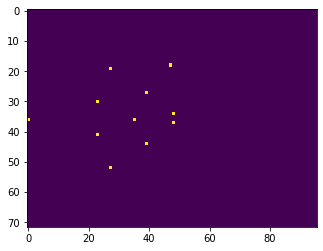

Team 2:


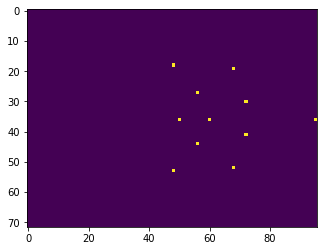

Position of the ball:


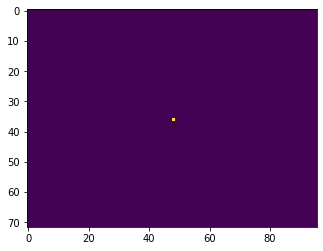

Position of active player:


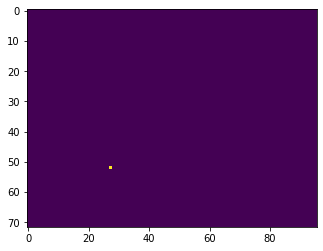

In [ ]:
obs = smm_env.reset()


print(f"Shape: {obs.shape}\n")
print('Team 1:')
plt.imshow(obs[:, :, 0])
plt.show()

print('Team 2:')
plt.imshow(obs[:, :, 1])
plt.show()

print('Position of the ball:')
plt.imshow(obs[:, :, 2])
plt.show()

print('Position of active player:')
plt.imshow(obs[:, :, 3])
plt.show()

# Now, you can run it:

In [ ]:
    def _play_episode(self, max_episode_steps: int = 500,
                      training: bool = False, render: bool = True) -> Tuple[float, int]:
        """
        Play a single episode and return the total reward.
        :param max_episode_steps: Max steps before stopping, overrides any time limit set by Gym.
        :param training: Bool to indicate whether or not to use this experience to update the model.
        :param render: Bool to indicate whether or not to call env.render() each training step.
        :return: The total real reward for the episode.
        """
        self.env._max_episode_steps = max_episode_steps
        obs = self.env.reset()
        total_reward = 0
        for frame in range(max_episode_steps):
            action = self.get_action(obs, training=training)
            prev_obs = obs
            obs, reward, done, info = self.env.step(action)
            total_reward += reward

            if render:
                self.env.render()

            if training:
                self.update_model(s=prev_obs, a=action, r=reward, d=done, s_=obs)

            if done:
                break

        return total_reward, frame

    

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
  5%|▌         | 1/20 [00:28<09:05, 28.71s/it]

linear_q: Reward: -3.0 from 1999 frames in 28.708 s (70.0 f/s). Eps remaining: 0.01


 10%|█         | 2/20 [00:58<08:44, 29.13s/it]

linear_q: Reward: 0.0 from 1999 frames in 29.425 s (68.0 f/s). Eps remaining: 0.01


 15%|█▌        | 3/20 [01:24<07:53, 27.85s/it]

linear_q: Reward: -2.0 from 1999 frames in 26.319 s (76.0 f/s). Eps remaining: 0.01


 20%|██        | 4/20 [01:49<07:08, 26.76s/it]

linear_q: Reward: -2.0 from 1999 frames in 25.097 s (80.0 f/s). Eps remaining: 0.01


 25%|██▌       | 5/20 [02:14<06:32, 26.19s/it]

linear_q: Reward: -3.0 from 1999 frames in 25.168 s (79.0 f/s). Eps remaining: 0.01


 30%|███       | 6/20 [02:40<06:04, 26.00s/it]

linear_q: Reward: -1.0 from 1999 frames in 25.633 s (78.0 f/s). Eps remaining: 0.01


 35%|███▌      | 7/20 [03:06<05:40, 26.20s/it]

linear_q: Reward: -2.0 from 1999 frames in 26.601 s (75.0 f/s). Eps remaining: 0.01


 40%|████      | 8/20 [03:32<05:10, 25.87s/it]

linear_q: Reward: -1.0 from 1999 frames in 25.156 s (79.0 f/s). Eps remaining: 0.01


 45%|████▌     | 9/20 [03:57<04:44, 25.85s/it]

linear_q: Reward: -3.0 from 1999 frames in 25.812 s (77.0 f/s). Eps remaining: 0.01


 50%|█████     | 10/20 [04:23<04:16, 25.65s/it]

linear_q: Reward: -2.0 from 1999 frames in 25.19 s (79.0 f/s). Eps remaining: 0.01


 55%|█████▌    | 11/20 [04:48<03:49, 25.46s/it]

linear_q: Reward: -2.0 from 1999 frames in 25.009 s (80.0 f/s). Eps remaining: 0.01


 60%|██████    | 12/20 [05:13<03:23, 25.45s/it]

linear_q: Reward: -2.0 from 1999 frames in 25.427 s (79.0 f/s). Eps remaining: 0.01


 65%|██████▌   | 13/20 [05:39<02:59, 25.61s/it]

linear_q: Reward: -3.0 from 1999 frames in 25.966 s (77.0 f/s). Eps remaining: 0.01


 70%|███████   | 14/20 [06:05<02:34, 25.77s/it]

linear_q: Reward: -3.0 from 1999 frames in 26.134 s (76.0 f/s). Eps remaining: 0.01


 75%|███████▌  | 15/20 [06:30<02:08, 25.62s/it]

linear_q: Reward: -3.0 from 1999 frames in 25.289 s (79.0 f/s). Eps remaining: 0.01


 80%|████████  | 16/20 [06:56<01:42, 25.59s/it]

linear_q: Reward: -4.0 from 1999 frames in 25.5 s (78.0 f/s). Eps remaining: 0.01


 85%|████████▌ | 17/20 [07:21<01:16, 25.46s/it]

linear_q: Reward: -3.0 from 1999 frames in 25.145 s (79.0 f/s). Eps remaining: 0.01


 90%|█████████ | 18/20 [07:47<00:50, 25.44s/it]

linear_q: Reward: 0.0 from 1999 frames in 25.413 s (79.0 f/s). Eps remaining: 0.01


 95%|█████████▌| 19/20 [08:13<00:25, 25.67s/it]

linear_q: Reward: -1.0 from 1999 frames in 26.205 s (76.0 f/s). Eps remaining: 0.01


100%|██████████| 20/20 [08:38<00:00, 25.94s/it]

linear_q: Reward: 0.0 from 1999 frames in 25.498 s (78.0 f/s). Eps remaining: 0.01


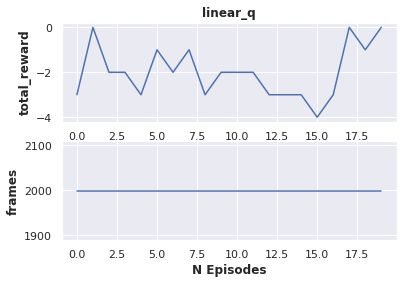

In [ ]:
import gym
from reinforcement_learning_keras.agents.components.history.training_history import TrainingHistory
from reinforcement_learning_keras.agents.q_learning.exploration.epsilon_greedy import EpsilonGreedy
from reinforcement_learning_keras.agents.q_learning.linear_q_agent import LinearQAgent
from sklearn.exceptions import DataConversionWarning

import warnings
if __name__ == "__main__":
  #ORIZO TON AGENT KAI TO PERIBALLON EKPAIDEYSIS
    agent = LinearQAgent(name="linear_q",
                         env_spec="GFootball-11_vs_11_kaggle-simple115v2-v0",
                         eps=EpsilonGreedy(eps_initial=0.9, decay=0.001, eps_min=0.01, decay_schedule='linear'),
                         training_history=TrainingHistory(agent_name='linear_q', plotting_on=True, plot_every=10, 
                                                          rolling_average=1))
    #DEN EMFANIZEI TA WARININGS

    with warnings.catch_warnings():
        warnings.simplefilter('ignore', DataConversionWarning)


        agent.train(verbose=True, render=False,
                    n_episodes=20, max_episode_steps=2000)  #typose gia 20 episodia ,20 bimata to kathe episodio . nai verbose , oxi se grafika

In [ ]:
#pixels_env.render()
#obs = pixels_env.reset()

In [ ]:
import gym
import gfootball  # Required as envs registered on import

simple_env = gym.make("GFootball-11_vs_11_kaggle-simple115v2-v0") # me ta noumera 
pixels_env = gym.make("GFootball-11_vs_11_kaggle-Pixels-v0")# me tous anthropous 
smm_env = gym.make("GFootball-11_vs_11_kaggle-SMM-v0")# me tis koukides 

print(f"simple115v2:\n {simple_env.__str__()}\n")
print(f"Pixels:\n {pixels_env.__str__()}\n")
print(f"SMM:\n {smm_env.__str__()}\n")

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


simple115v2:
 <GetStateWrapper<SingleAgentRewardWrapper<SingleAgentObservationWrapper<Simple115StateWrapper<FootballEnv<GFootball-11_vs_11_kaggle-simple115v2-v0>>>>>>

Pixels:
 <GetStateWrapper<SingleAgentRewardWrapper<SingleAgentObservationWrapper<PixelsStateWrapper<FootballEnv<GFootball-11_vs_11_kaggle-Pixels-v0>>>>>>

SMM:
 <GetStateWrapper<SingleAgentRewardWrapper<SingleAgentObservationWrapper<SMMWrapper<FootballEnv<GFootball-11_vs_11_kaggle-SMM-v0>>>>>>

